In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
numSamples = 204

base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
dataset = pd.read_csv(base_dir+'\_data\dataset.csv', header=None)
# print(dataset)
data_arr = dataset.to_numpy()
# print(data_arr.shape)
data_arr = data_arr.reshape(15, 204)
# print(data_arr[0, :])
data_arr = data_arr.T
# print(data_arr[0, :])

new_dataset = pd.DataFrame(data_arr, columns=['Patient', 'Direction', 'Magnitude', 'Cz_1', 'Cz_2',
                                           'Cz_3', 'Cz_4', 'Agonist_1', 'Agonist_2', 'Agonist_3', 
                                           'Agonist_4', 'Agonist_5', 'Agonist_6', 'Agonist_7', 'Agonist_8'])
new_dataset.to_csv(base_dir+'\\transformed_dataset.csv')

### Extract the Inputs of the Model

In [13]:
input = new_dataset.drop(new_dataset.columns[[0,1,2, 7,8,9,10,11,12,13,14]], axis = 1)
input_arr = input.to_numpy()

### Complete PCA and find Principal Components

In [14]:
def runPCA(inputArr):
    scaling = StandardScaler()

    scaling.fit(inputArr)
    scaled_data = scaling.transform(inputArr)

    principal_comp = PCA()
    principal_comp.fit(scaled_data)
    x = principal_comp.transform(scaled_data)

    print(x.shape)
    print("Principal Components = \n", principal_comp.components_)
    print("Variance Ratio = \n", principal_comp.explained_variance_ratio_)
    return x

x = runPCA(input_arr)

(204, 4)
Principal Components = 
 [[ 0.51588385  0.63279668  0.30026758  0.4932257 ]
 [-0.09330236 -0.0145145   0.89772818 -0.43031164]
 [ 0.75366247 -0.02799775 -0.21888433 -0.61911118]
 [-0.39642326  0.77367552 -0.23667095 -0.43389128]]
Variance Ratio = 
 [0.4109274  0.24218025 0.2044866  0.14240576]


### Generate Plots

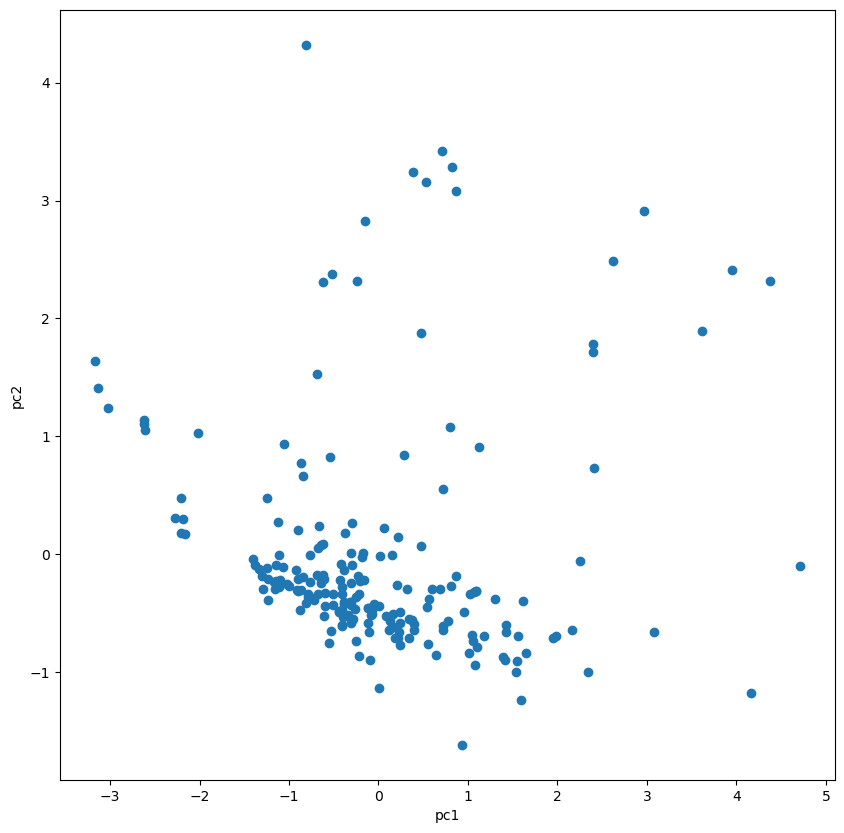

In [15]:
twoD = plt.figure(figsize=(10,10))
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.scatter(x[:,0], x[:, 1])
twoD.show

twoD.savefig(base_dir + '/_images/PCA.jpg')